# marginsplot

https://www.sohu.com/a/303447959_668066

我们从边际效应（求偏导数）的角度考察了交互效应的经济含义。
- 这隐含地假设了，在交互项的两个变量中，至少有一个为连续变量，故可以求偏导数。
- 如果两个变量都是离散变量（比如虚拟变量），则此法不通，因为无法求导数。
    - 但离散变量的交互效应也有其方便之处，可以将相应的回归方程用分段函数来表示。

如果根据虚拟变量 取值为0或1将全样本分为两个子样本，则这两个子样本所对应的回归方程并不相同（截距项与斜率均可不同）。对于分段函数，很容易用画图的方法来形象地展示，即所谓“交互效应图”（interaction plot）。



(1978 Automobile Data)


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(5, 68)        =      5.11
       Model |   173500220         5    34700044   Prob > F        =    0.0005
    Residual |   461565176        68  6787723.18   R-squared       =    0.2732
-------------+----------------------------------   Adj R-squared   =    0.2198
       Total |   635065396        73  8699525.97   Root MSE        =    2605.3

------------------------------------------------------------------------------
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         mpg |  -187.2796   87.51179    -2.14   0.036    -361.9066   -12.65253
    headroom |  -690.6378   482.0967    -1.43   0.157    -1652.647    271.3712
       trunk |   70.10822   119.0702     0.59   0.558    -167.4926    307.7091
      length |   56.94703

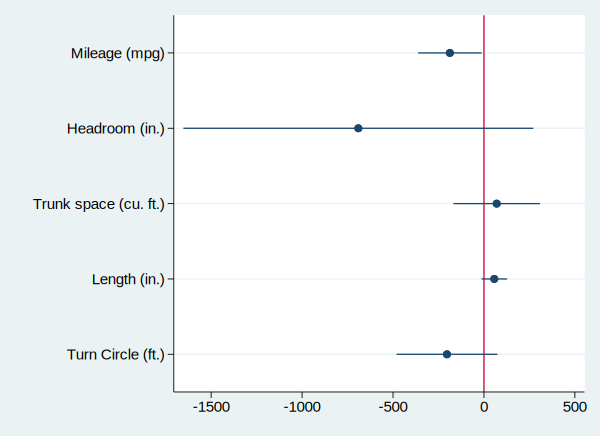

In [90]:
sysuse auto, clear

regress price mpg headroom trunk length turn

coefplot, drop(_cons) xline(0)

In [89]:
*ssc install coefplot

checking coefplot consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.




      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(5, 46)        =      3.90
       Model |   145742460         5    29148492   Prob > F        =    0.0049
    Residual |   343452340        46  7466355.23   R-squared       =    0.2979
-------------+----------------------------------   Adj R-squared   =    0.2216
       Total |   489194801        51  9592054.92   Root MSE        =    2732.5

------------------------------------------------------------------------------
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         mpg |  -218.4576   162.8462    -1.34   0.186    -546.2499    109.3347
    headroom |  -710.5966   579.0558    -1.23   0.226    -1876.176    454.9823
       trunk |   46.94429   175.9435     0.27   0.791    -307.2117    401.1003
      length |   46.53995   53.68823     0.87   0

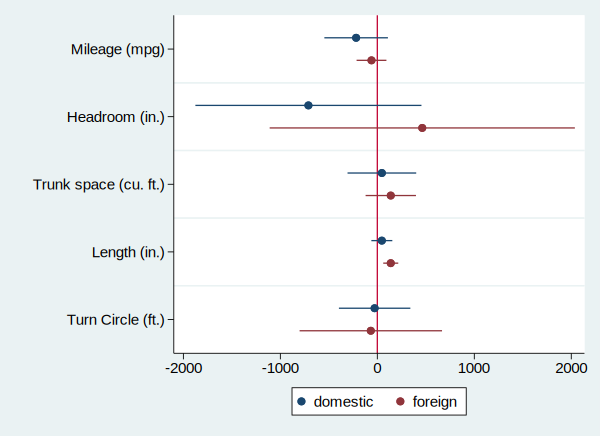

In [91]:
regress price mpg headroom trunk length turn if foreign==0
estimates store domestic
regress price mpg headroom trunk length turn if foreign==1
estimates store foreign
coefplot domestic foreign, drop(_cons) xline(0)

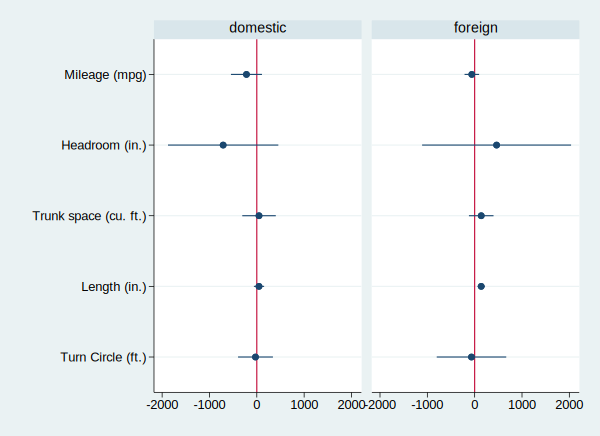

In [92]:
coefplot domestic || foreign, drop(_cons) xline(0)

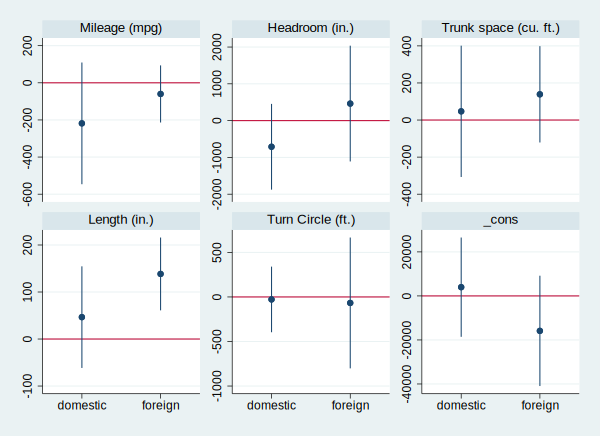

In [93]:
coefplot domestic || foreign, yline(0) bycoefs vertical byopts(yrescale)

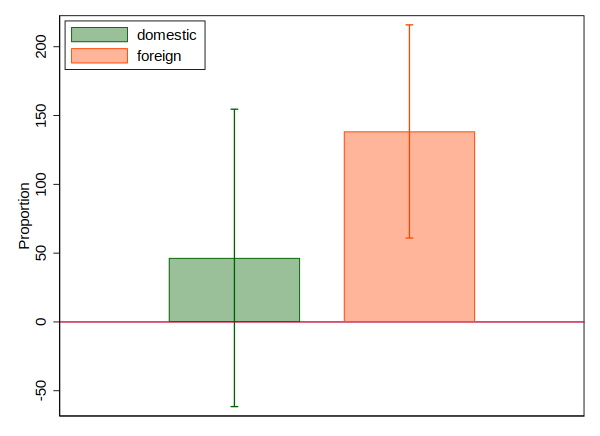

In [94]:
set scheme s1color
coefplot domestic foreign, vertical recast(bar) keep(length) ///
barwidth(0.25) fcolor(*.5)  graphregion(fcolor(white)) ///
ciopts(recast(rcap)) citop yline(0) ytitle(Proportion)  legend(posi(11) ring(0) row(2)) xlabel(,nolabel notick) 
gr_edit plotregion1.style.editstyle boxstyle(linestyle(color(none))) editcopy

In [77]:
sysuse auto, clear
des


(1978 Automobile Data)


Contains data from /Applications/Stata/ado/base/a/auto.dta
  obs:            74                          1978 Automobile Data
 vars:            12                          13 Apr 2016 17:45
 size:         3,182                          (_dta has notes)
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
make            str18   %-18s                 Make and Model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair Record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %8.0g 

In [82]:
regress price c.length##c.mpg   //调节效应回归



      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(3, 70)        =      9.93
       Model |   189535456         3  63178485.2   Prob > F        =    0.0000
    Residual |   445529940        70  6364713.44   R-squared       =    0.2985
-------------+----------------------------------   Adj R-squared   =    0.2684
       Total |   635065396        73  8699525.97   Root MSE        =    2522.8

------------------------------------------------------------------------------
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      length |   149.6525    53.4715     2.80   0.007     43.00691     256.298
         mpg |   1029.956   465.1151     2.21   0.030     102.3134    1957.599
             |
    c.length#|
       c.mpg |  -7.117735   2.704892    -2.63   0.010    -12.51247   -1.722998
             |
     

In [57]:
est sto regression 

In [58]:
//分别求自变量与调节变量加减一个标准差的值
foreach v of var length mpg {
  su `v' if e(sample)
  local low_`v'=r(mean)-r(sd)
  local high_`v'=r(mean)+r(sd)
}



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      length |         74    187.9324    22.26634        142        233

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41


In [59]:
est restore regression //调取保存的回归结果
margins , at(mpg=(`low_mpg' `high_mpg') ///
         length = (`low_length' `high_length'))  //计算边际效应



(results regression are active now)


Adjusted predictions                            Number of obs     =         74
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : length          =    165.6661
               mpg             =    15.51179

2._at        : length          =    165.6661
               mpg             =     27.0828

3._at        : length          =    210.1988
               mpg             =    15.51179

4._at        : length          =    210.1988
               mpg             =     27.0828

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |    6351.82   978.2646     6.49   0.000     4400.733    8302.907
          2  |   4625.299    428.545    10.79   0.000     3770.593    5480.005
    


  Variables that uniquely identify margins: mpg length


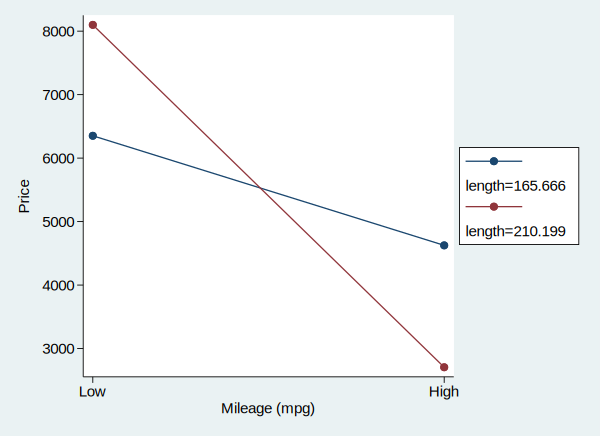

In [60]:
marginsplot , xlabel(`low_mpg' "Low" `high_mpg' "High")  ///
              ytitle("Price")       ///
              ylabel(, angle(horizontal) nogrid) ///
              legend(position(3) col(1) stack)   ///
              title("") noci

In [53]:
//分别求自变量与调节变量加减一个标准差的值
foreach v of var length mpg {
   su `v' if e(sample)
   local low_`v'=r(mean)-r(sd)
   local high_`v'=r(mean)+r(sd)
}

est restore regression //在调取保存的回归结果
*-y轴的范围从2000至10000，间隔为1000
margins , at(mpg=(`low_mpg' `high_mpg') ///
            length = (`low_length' `high_length')) //计算边际效应



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      length |         74    187.9324    22.26634        142        233

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

(results regression are active now)


Adjusted predictions                            Number of obs     =         74
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : length          =    165.6661
               mpg             =    15.51179

2._at        : length          =    165.6661
               mpg             =     27.0828

3._at        : length          =    210.1988
               mpg             =    15.51179

4._at        : length          =    210.1988
               mpg             =     27.0828

------------------


  Variables that uniquely identify margins: mpg length


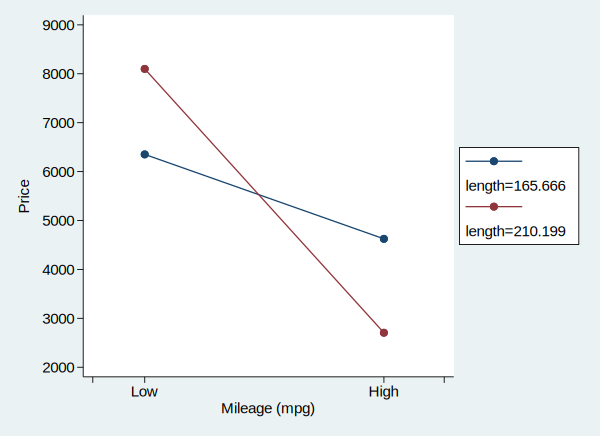

In [55]:
marginsplot,  ///
   xlabel(13 " " `low_mpg' "Low" `high_mpg' "High" 30 " ") ///
   ytitle("Price")            ///
   ylabel(2000(1000)9000, angle(0) nogrid) ///
   legend(position(3) col(1) stack)        ///
   title("") noci

(bin=8, start=12, width=3.625)


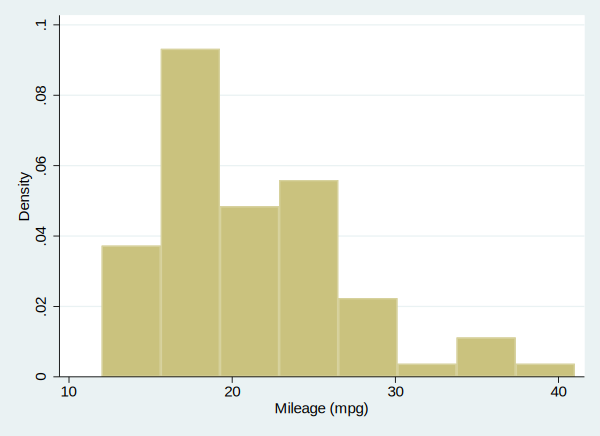

In [65]:
hist(mpg) 

(bin=8, start=142, width=11.375)


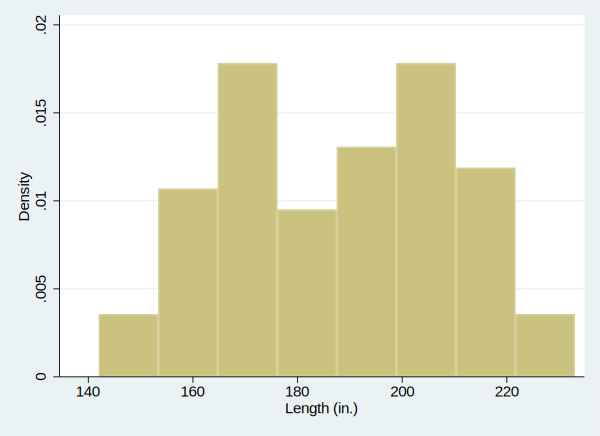

In [66]:
hist(length)

下面以Stata手册（Stata Manual）所提供的案例进行示范。我们使用的数据集为nhanes2，来自Second National Health and Nutrition Examination Survey (NHANES II)，包含10,351名美国人在1976-1980间的健康数据。

被解释变量为“bpsystol”（systolic blood pressure，收缩压），而解释变量为“agegrp”（age group，年龄组）与“sex”（性别）。其中，agegrp为离散变量（分类变量），而sex为虚拟变量。

In [18]:
use http://www.stata-press.com/data/r15/nhanes2

In [19]:
tab agegrp sex


           |   1=male, 2=female
 Age Group |      Male     Female |     Total
-----------+----------------------+----------
     20-29 |     1,116      1,204 |     2,320 
     30-39 |       770        852 |     1,622 
     40-49 |       610        662 |     1,272 
     50-59 |       602        689 |     1,291 
     60-69 |     1,369      1,491 |     2,860 
       70+ |       448        538 |       986 
-----------+----------------------+----------
     Total |     4,915      5,436 |    10,351 



从上表可知，变量sex的参照组为男性（1=male，即sex=0），而另一组为女性（2=female，即sex=1）。变量agegrp则分为六类，分别对应于年龄在20-29，30-39，40-49，40-59，60-69，以及70岁以上的个体。

In [20]:
regress bpsystol agegrp##sex


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(11, 10339)    =    312.88
       Model |  1407229.28        11  127929.935   Prob > F        =    0.0000
    Residual |  4227440.75    10,339  408.882943   R-squared       =    0.2497
-------------+----------------------------------   Adj R-squared   =    0.2489
       Total |  5634670.03    10,350  544.412563   Root MSE        =    20.221

-------------------------------------------------------------------------------
     bpsystol |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
       agegrp |
       30-39  |   .7956175   .9473117     0.84   0.401    -1.061297    2.652532
       40-49  |   5.117078   1.018176     5.03   0.000     3.121256      7.1129
       50-59  |   12.20018   1.022541    11.93   0.000      10.1958    14.20456
       60-69  |   16.85887  

其中，“agegrp##sex”表示既包含根据agegrp所生成的虚拟变量与sex虚拟变量（即所谓“主效应”，main effects，就是一次项），也包含agegrp系列的虚拟变量与sex的交叉项（即一系列的交互项）。

从上表可知，所有交互效应（五个交互项）均在1%水平上显著为正，且此交互效应随着年龄组而上升。然而，女性虚拟变量本身（Female）则显著为负。

In [21]:
margins agegrp#sex


Adjusted predictions                            Number of obs     =     10,351
Model VCE    : OLS

Expression   : Linear prediction, predict()

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
   agegrp#sex |
  20-29#Male  |   123.8862   .6052954   204.67   0.000     122.6997    125.0727
20-29#Female  |   111.2849   .5827553   190.96   0.000     110.1426    112.4272
  30-39#Male  |   124.6818    .728709   171.10   0.000     123.2534    126.1102
30-39#Female  |   116.2207    .692755   167.77   0.000     114.8627    117.5786
  40-49#Male  |   129.0033   .8187185   157.57   0.000     127.3984    130.6081
40-49#Female  |   125.0468   .7859058   159.11   0.000     123.5063    126.5874
  50-59#Male  |   136.0864   .8241405   165.13   0.000     134.4709    137.7019


  Variables that uniquely identify margins: agegrp sex


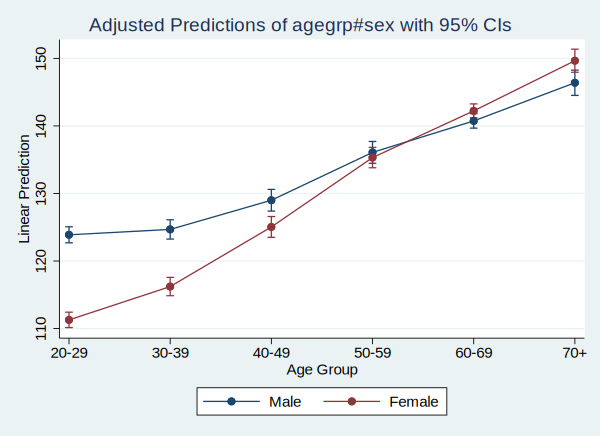

In [22]:
marginsplot

In [23]:
margins agegrp, dydx(sex)


Conditional marginal effects                    Number of obs     =     10,351
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : 2.sex

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
1.sex        |  (base outcome)
-------------+----------------------------------------------------------------
2.sex        |
      agegrp |
      20-29  |  -12.60132   .8402299   -15.00   0.000    -14.24833    -10.9543
      30-39  |  -8.461161   1.005448    -8.42   0.000    -10.43203   -6.490288
      40-49  |  -3.956451   1.134878    -3.49   0.000    -6.181031   -1.731871
      50-59  |  -.7699782   1.128119    -0.68   0.495    -2.981309    1.441353
      60-69  |   1.491684    .756906     1.97   0.049     .0080022    2.975367
        70+  |   3.2647

其中，第1部分的“1.sex”表示作为基准的男性，故不显示结果（base outcome）。而第2部分的“2.sex”则表示女性，其第1行（20-29）的第1列dy/dx值表示，相对于样本中20-29岁的男性子样本，同年龄组的女性子样本的平均拟合值更低12.60132；以此类推。


  Variables that uniquely identify margins: agegrp


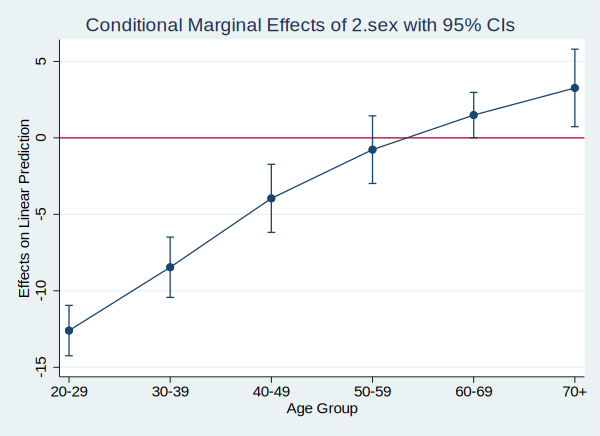

In [24]:
marginsplot, yline(0)

In [97]:
clear 
set obs 4000
set seed 123
gen x = rnormal()
gen e = rnormal()
gen y = 2*x^2 - 4*x - 1
gen x2 = x^2
reg y x x2



number of observations (_N) was 0, now 4,000







      Source |       SS           df       MS      Number of obs   =     4,000
-------------+----------------------------------   F(2, 3997)      =         .
       Model |  101166.137         2  50583.0686   Prob > F        =         .
    Residual |           0     3,997           0   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =    1.0000
       Total |  101166.137     3,999  25.2978588   Root MSE        =         0

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |         -4          .        .       .            .           .
          x2 |          2          .        .       .            .           .
       _cons |         -1          .        .       .            .          

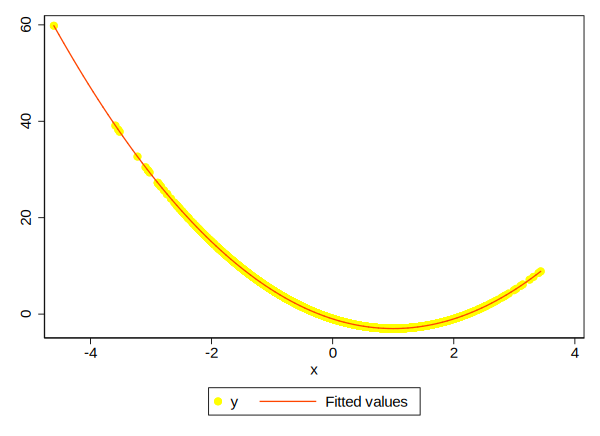

In [98]:
twoway (scatter y x, mcolor(yellow)) (qfit y x)


(598 observations deleted)


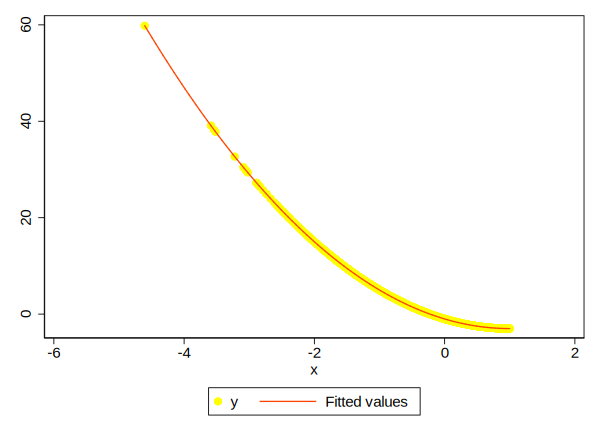

In [99]:
keep if x < 1
twoway (scatter y x, mcolor(yellow)) (qfit y x)

In [100]:
reg y x x2


      Source |       SS           df       MS      Number of obs   =     3,402
-------------+----------------------------------   F(2, 3399)      =         .
       Model |  93245.5476         2  46622.7738   Prob > F        =         .
    Residual |           0     3,399           0   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =    1.0000
       Total |  93245.5476     3,401  27.4170972   Root MSE        =         0

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |         -4          .        .       .            .           .
          x2 |          2          .        .       .            .           .
       _cons |         -1          .        .       .            .           .
--------------------------------------------------

In [103]:
utest x x2


Specification: f(x)=x^2
Extreme point:         1

Test:
     H1: U shape
 vs. H0: Monotone or Inverse U shape 

-------------------------------------------------
                 |   Lower bound      Upper bound
-----------------+-------------------------------
Interval         |   -4.604603          .998509
Slope            |   -22.41841        -.0059638
-------------------------------------------------

Extremum outside interval - trivial failure to reject H0


In [102]:
*ssc install utest

checking utest consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.
